In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")
from pmdarima import auto_arima 
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
df = pd.read_csv('../datatest/monthly-car-sales.csv')

In [4]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<AxesSubplot:>

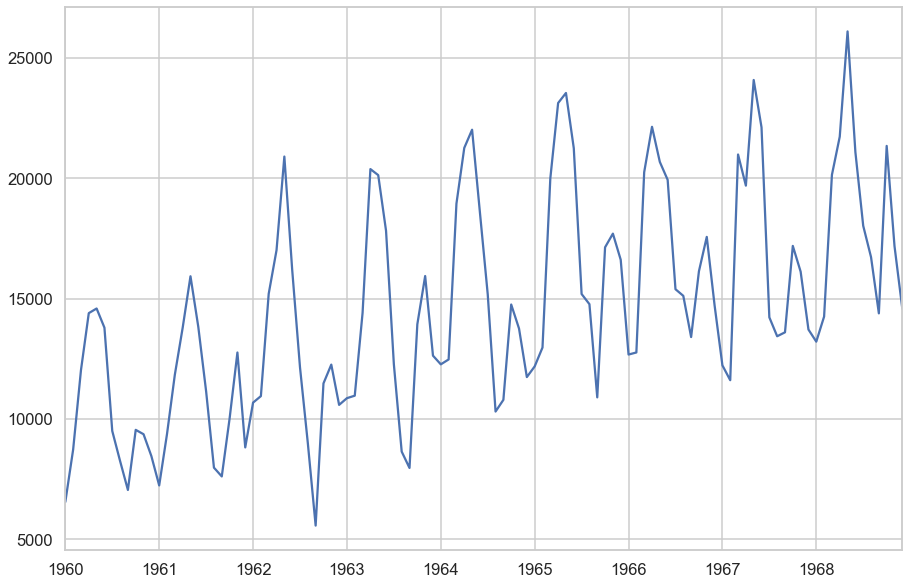

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df['Sales'].plot()

Задание №1 
-------
Разложить на компоненты, используя функцию <code>seasonal_decompose</code>

<AxesSubplot:>

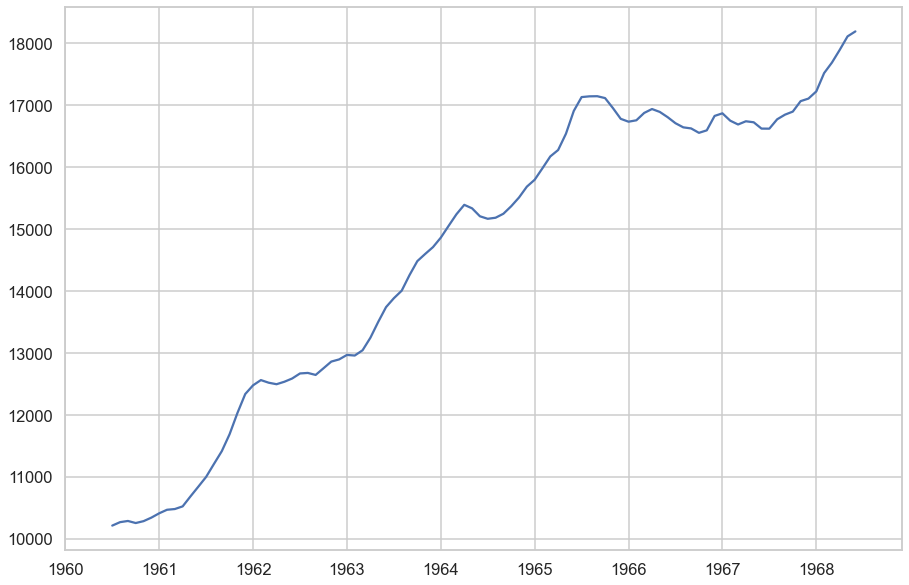

In [6]:
# your code
result=seasonal_decompose(df['Sales'], model='multiplicable', period=12)
result.trend.plot()

<AxesSubplot:>

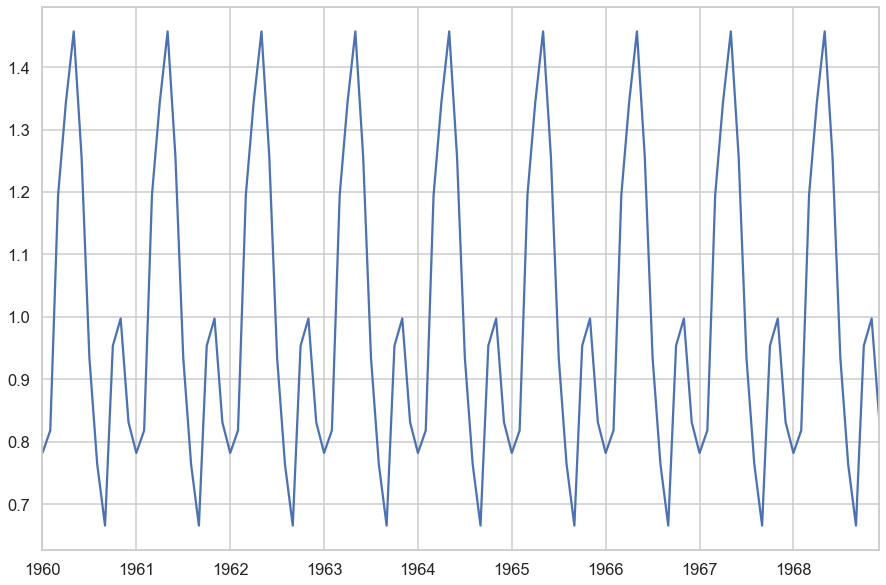

In [7]:
result.seasonal.plot()

<AxesSubplot:>

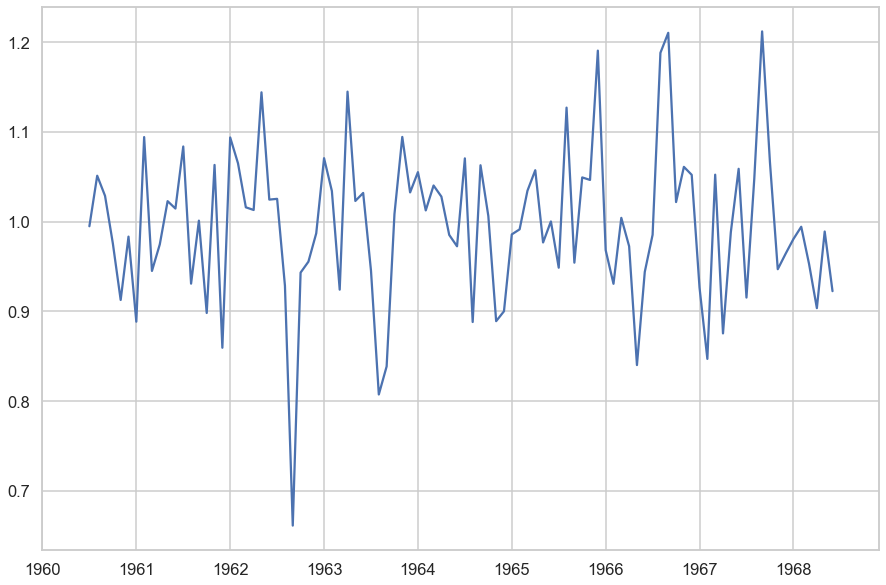

In [8]:
result.resid.plot()

Проверим, является ли временной ряд стационарным. 

In [9]:
result = adfuller(df['Sales'])
print('p-value: %f' % result[1])

p-value: 0.663269


Ряд не стационарный, попробуем сделать одну дифференциацию.

In [10]:
df['diff'] = df['Sales'].diff()
df.dropna(inplace=True)

result = adfuller(df['diff'])
print('p-value: %f' % result[1])

p-value: 0.000000


<AxesSubplot:>

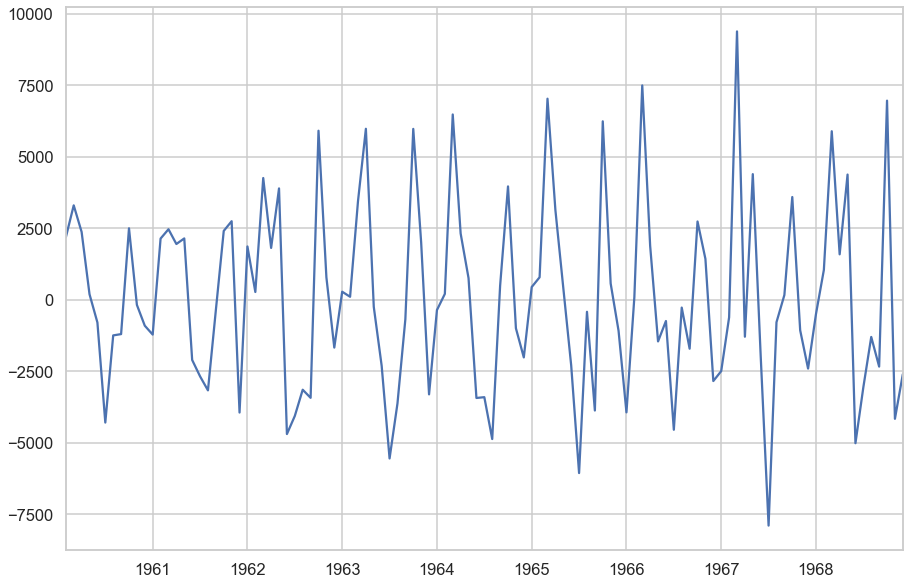

In [11]:
df['diff'].plot()

Задание №2
------
Сделать графики авто корреляции и часточной автокорреляции с помощью функций <code> plot_acf </code> и <code> plot_pacf </code>.

Если при использовании функции <code> plot_pacf </code> появляется ошибка <code>RuntimeWarning: invalid value encountered in sqrt</code> , можно изменить дефолтное значение метода, используемого для рассчета частичной автокорреляции. Почитать про методы можно почитать здесь:
<a>https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html</a>

Попробуйте использовать <code> method = 'ldadjusted' </code>

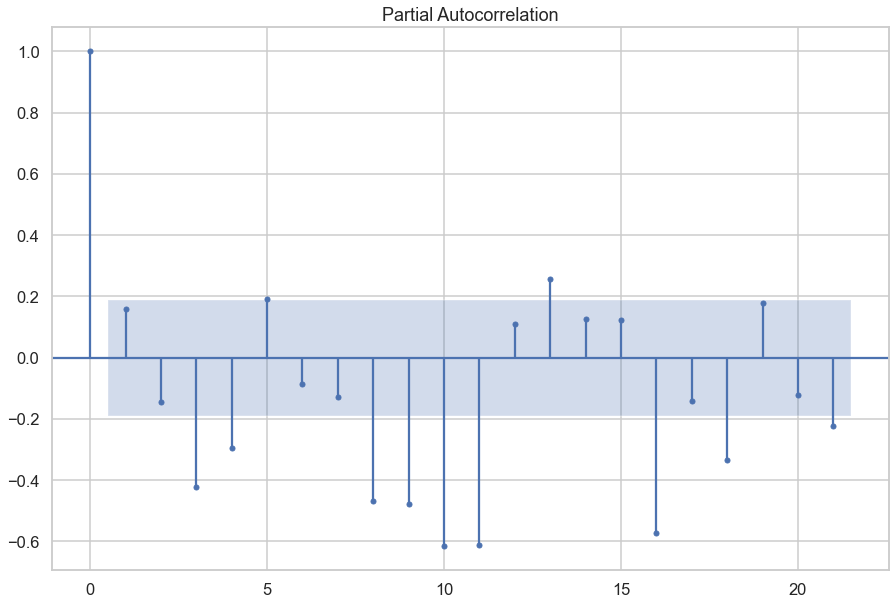

In [12]:
#your code 
plot_pacf(df['diff'], method = 'ldadjusted')
plt.show()

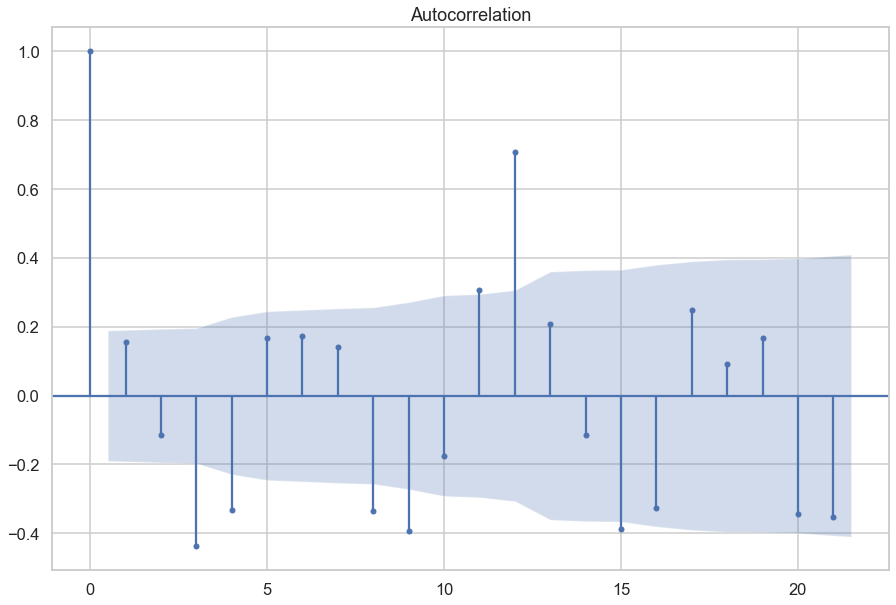

In [13]:
plot_acf(df['diff'])
plt.show()

In [14]:
# split data into train and test

# what is the size of 80% ? 
size = int(len(df)*0.8)

# use 80% for train and 20% for test

train, test = df[0:size], df[size:]
print(f'Length of train is {len(train)} and lenght of test is {len(test)}')

Length of train is 85 and lenght of test is 22


In [15]:
model = ARIMA(train['Sales'], order=(2,1,2))
model_fit = model.fit(cov_type = 'approx')
preds = model_fit.forecast(len(test))

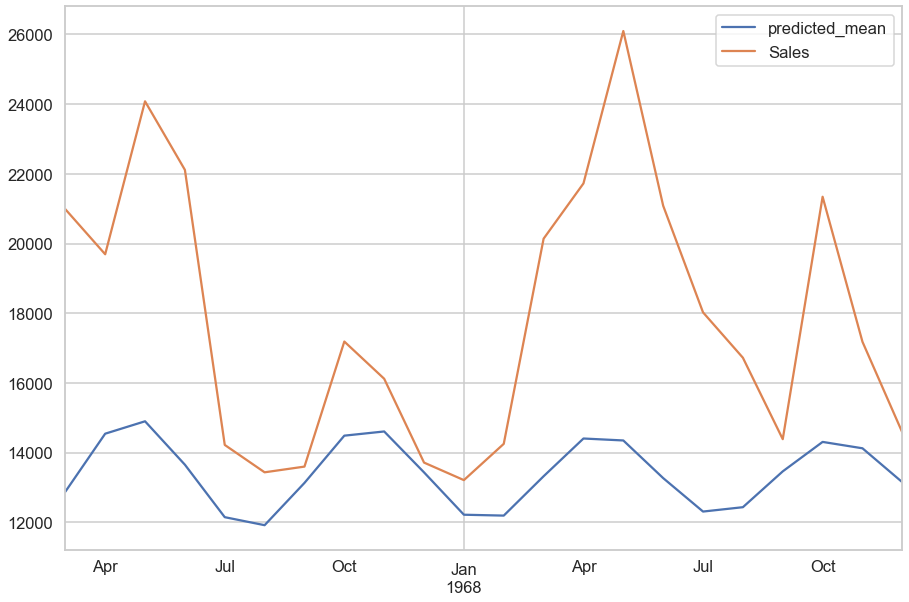

In [23]:
preds.plot()
test['Sales'].plot()
plt.legend()
plt.show()

Задание №3
===
Используя <code>auto_arima</code> найти оптимальный набор параметров, натренировать на нем модель (на тренировочных данных) и сделать прогноз для теста. Сделать графики и посчитать качество предсказаний, используя метрики <code> r2_score </code> и <code> mean_absolute_error </code>.

<AxesSubplot:>

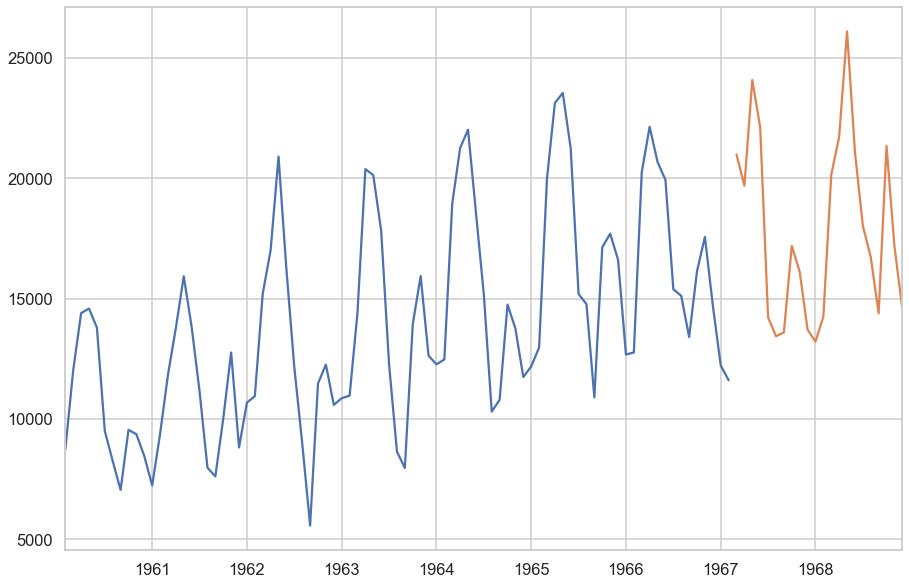

In [17]:
train['Sales'].plot()
test['Sales'].plot()

In [18]:
# your code
model = auto_arima(train['Sales'],
                   start_p=1,
                   start_q=1,
                   max_p=8,
                   max_q=8,
                   start_P=0,
                   start_Q=0,
                   max_P=8,max_Q=8,
                   m=12,seasonal=True,
                   stepwise=False,
                   suppress_warnings=True,D=1,d=1,error_action='warn',random_state=20,n_fits=30)

In [19]:
model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(4, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [20]:
model_fit = model.fit(train['Sales'])

In [21]:
forecast = model_fit.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])


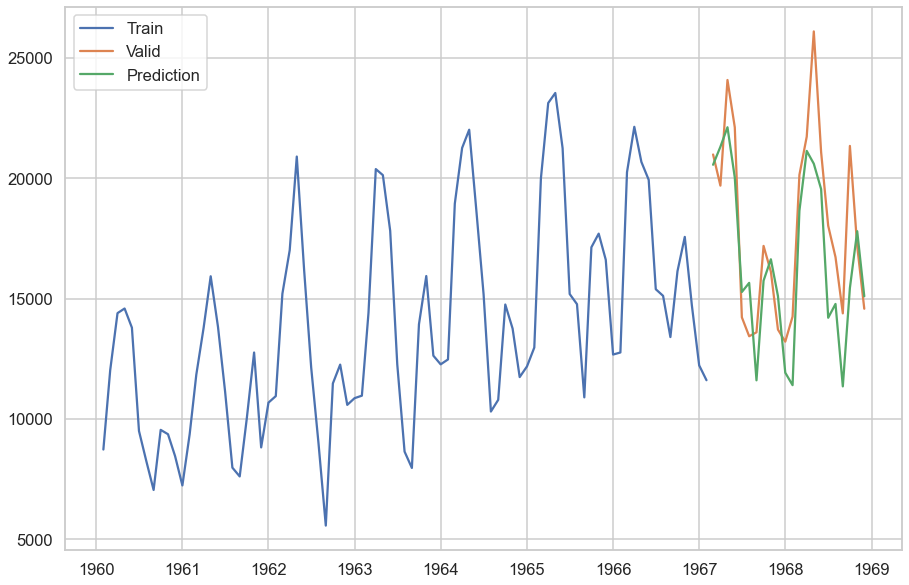

In [22]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [85]:
print(f"r2 score = {r2_score(test['Sales'], forecast)}, ", 
      f"mean_absolute_error = {mean_absolute_error(test['Sales'], forecast)}")

r2 score = 0.5719469064652162,  mean_absolute_error = 1990.4726606657327
